### Downloading Dataset

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-05-29 19:10:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 142.250.99.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   165MB/s    in 0.6s    

2023-05-29 19:10:11 (165 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [7]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'


In [8]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [9]:
import pathlib 
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


### View Image

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [11]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 512, 3)


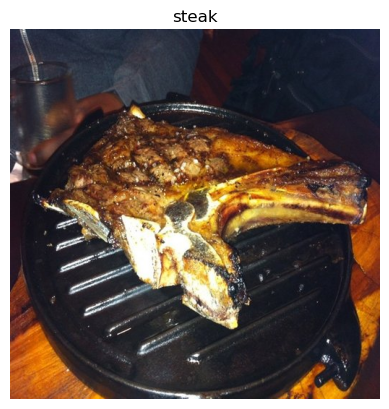

In [12]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [13]:
img

array([[[ 40,  42,  63],
        [ 39,  41,  62],
        [ 36,  41,  61],
        ...,
        [ 32,  40,  61],
        [ 32,  40,  61],
        [ 34,  42,  63]],

       [[ 40,  42,  63],
        [ 38,  40,  61],
        [ 35,  40,  60],
        ...,
        [ 32,  40,  61],
        [ 32,  40,  61],
        [ 33,  41,  62]],

       [[ 43,  45,  66],
        [ 41,  43,  64],
        [ 37,  42,  62],
        ...,
        [ 32,  40,  63],
        [ 32,  40,  61],
        [ 33,  41,  62]],

       ...,

       [[170,  77,  44],
        [163,  73,  38],
        [160,  67,  33],
        ...,
        [ 56,  29,  34],
        [ 55,  28,  33],
        [ 54,  27,  32]],

       [[167,  76,  45],
        [163,  74,  42],
        [160,  69,  38],
        ...,
        [ 58,  31,  36],
        [ 57,  30,  35],
        [ 56,  29,  34]],

       [[159,  70,  40],
        [160,  71,  41],
        [160,  71,  39],
        ...,
        [ 55,  28,  33],
        [ 55,  28,  33],
        [ 54,  27,  32]]

In [14]:
img.shape

(512, 512, 3)

In [15]:
img/255

array([[[0.15686275, 0.16470588, 0.24705882],
        [0.15294118, 0.16078431, 0.24313725],
        [0.14117647, 0.16078431, 0.23921569],
        ...,
        [0.1254902 , 0.15686275, 0.23921569],
        [0.1254902 , 0.15686275, 0.23921569],
        [0.13333333, 0.16470588, 0.24705882]],

       [[0.15686275, 0.16470588, 0.24705882],
        [0.14901961, 0.15686275, 0.23921569],
        [0.1372549 , 0.15686275, 0.23529412],
        ...,
        [0.1254902 , 0.15686275, 0.23921569],
        [0.1254902 , 0.15686275, 0.23921569],
        [0.12941176, 0.16078431, 0.24313725]],

       [[0.16862745, 0.17647059, 0.25882353],
        [0.16078431, 0.16862745, 0.25098039],
        [0.14509804, 0.16470588, 0.24313725],
        ...,
        [0.1254902 , 0.15686275, 0.24705882],
        [0.1254902 , 0.15686275, 0.23921569],
        [0.12941176, 0.16078431, 0.24313725]],

       ...,

       [[0.66666667, 0.30196078, 0.17254902],
        [0.63921569, 0.28627451, 0.14901961],
        [0.62745098, 0

Image shape: (512, 384, 3)


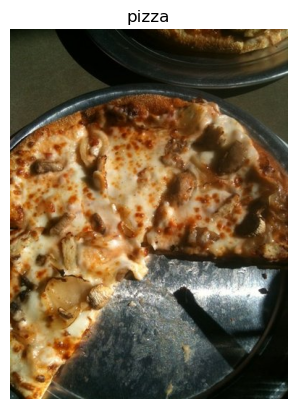

In [16]:
img2 = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

### Building our first CNN model

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [18]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

test_data = test_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             seed=42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 199ms/step - loss: 0.6170 - accuracy: 0.6293 - val_loss: 0.4591 - val_accuracy: 0.7773
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4381 - accuracy: 0.8073 - val_loss: 0.3829 - val_accuracy: 0.8347
Epoch 3/5
47/47 [==============================] - 9s 181ms/step - loss: 0.4054 - accuracy: 0.8153 - val_loss: 0.3925 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 8s 177ms/step - loss: 0.3604 - accuracy: 0.8460 - val_loss: 0.3191 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3306 - accuracy: 0.8607 - val_loss: 0.2879 - val_accuracy: 0.8893


In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


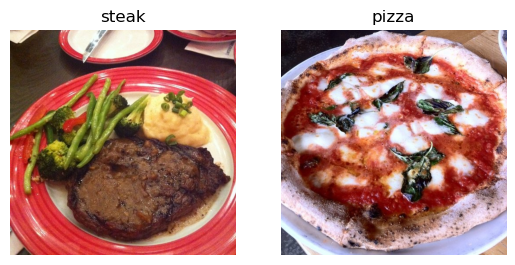

In [20]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [21]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [26]:
images[:2], images[0].shape

(array([[[[0.54509807, 0.4666667 , 0.23529413],
          [0.5294118 , 0.4039216 , 0.20392159],
          [0.53333336, 0.37254903, 0.19215688],
          ...,
          [0.78823537, 0.31764707, 0.49803925],
          [0.77647066, 0.29411766, 0.47450984],
          [0.8352942 , 0.3372549 , 0.5137255 ]],
 
         [[0.5529412 , 0.427451  , 0.23529413],
          [0.4039216 , 0.25882354, 0.09411766],
          [0.3803922 , 0.21176472, 0.07450981],
          ...,
          [0.7294118 , 0.26666668, 0.454902  ],
          [0.7254902 , 0.24313727, 0.427451  ],
          [0.79215693, 0.26666668, 0.46274513]],
 
         [[0.5058824 , 0.35686275, 0.20392159],
          [0.3803922 , 0.227451  , 0.1137255 ],
          [0.34509805, 0.19607845, 0.1137255 ],
          ...,
          [0.67058825, 0.21568629, 0.40000004],
          [0.69411767, 0.20000002, 0.38823533],
          [0.69803923, 0.15686275, 0.36078432]],
 
         ...,
 
         [[0.34509805, 0.2392157 , 0.12156864],
          [0.38039

In [27]:
labels

array([1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.],
      dtype=float32)

### Model Creation

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [29]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [30]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [31]:
len(train_data), len(test_data)

(47, 16)

In [32]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 139ms/step - loss: 0.8102 - accuracy: 0.6573 - val_loss: 0.5386 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4802 - accuracy: 0.7833 - val_loss: 0.4558 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3038 - accuracy: 0.8867 - val_loss: 0.4064 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 6s 134ms/step - loss: 0.1871 - accuracy: 0.9413 - val_loss: 0.5468 - val_accuracy: 0.7400
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.0800 - accuracy: 0.9860 - val_loss: 0.5244 - val_accuracy: 0.7920


### Evaluating the model

<Axes: >

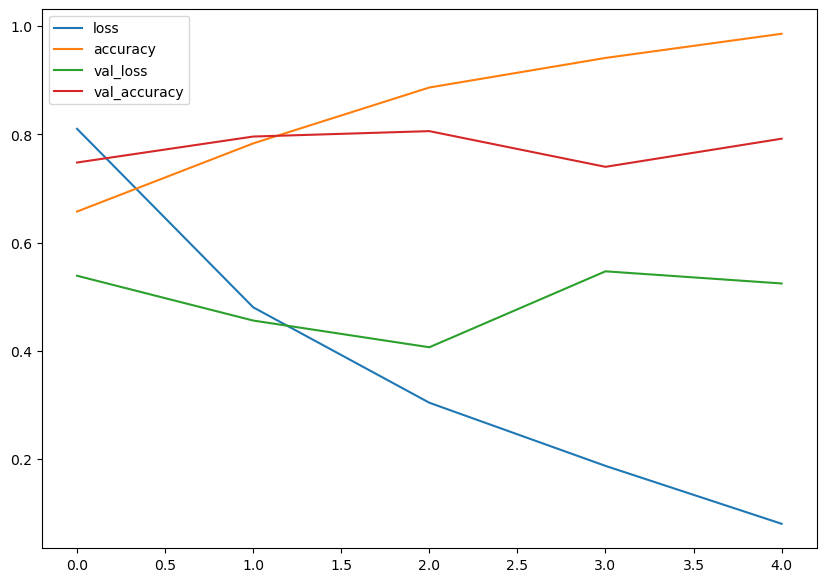

In [33]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [34]:
def plot_history_curves(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15, 6))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

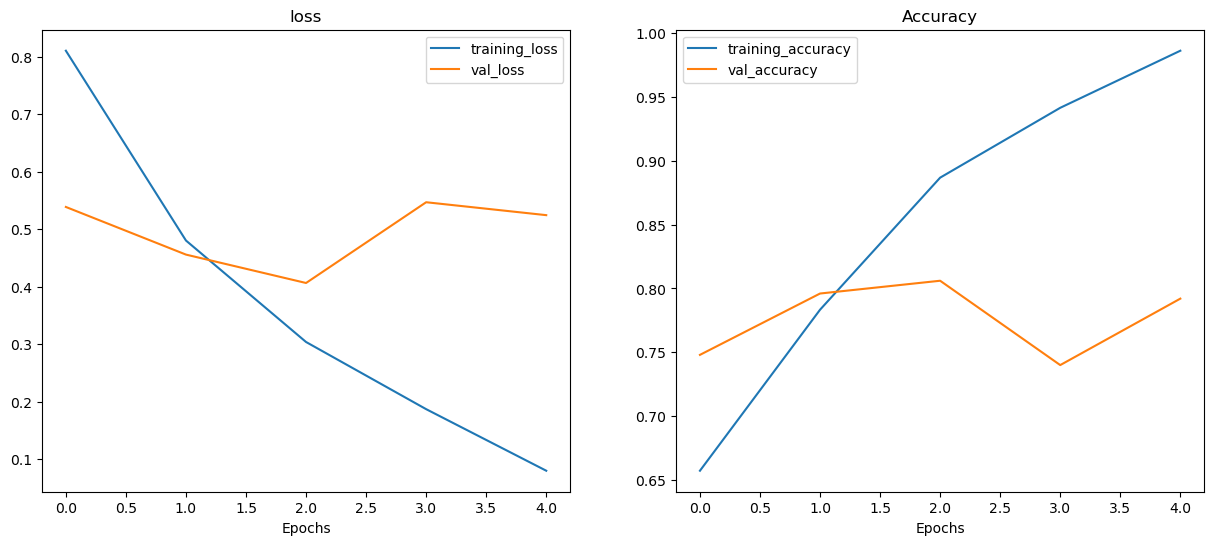

In [35]:
plot_history_curves(history_4)

In [36]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### Adjusting model parameters

In [37]:
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [38]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [39]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 121ms/step - loss: 0.5953 - accuracy: 0.6947 - val_loss: 0.4829 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4463 - accuracy: 0.8000 - val_loss: 0.3599 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.3964 - accuracy: 0.8273 - val_loss: 0.3473 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3728 - accuracy: 0.8367 - val_loss: 0.3305 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3533 - accuracy: 0.8500 - val_loss: 0.3388 - val_accuracy: 0.8520


In [40]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

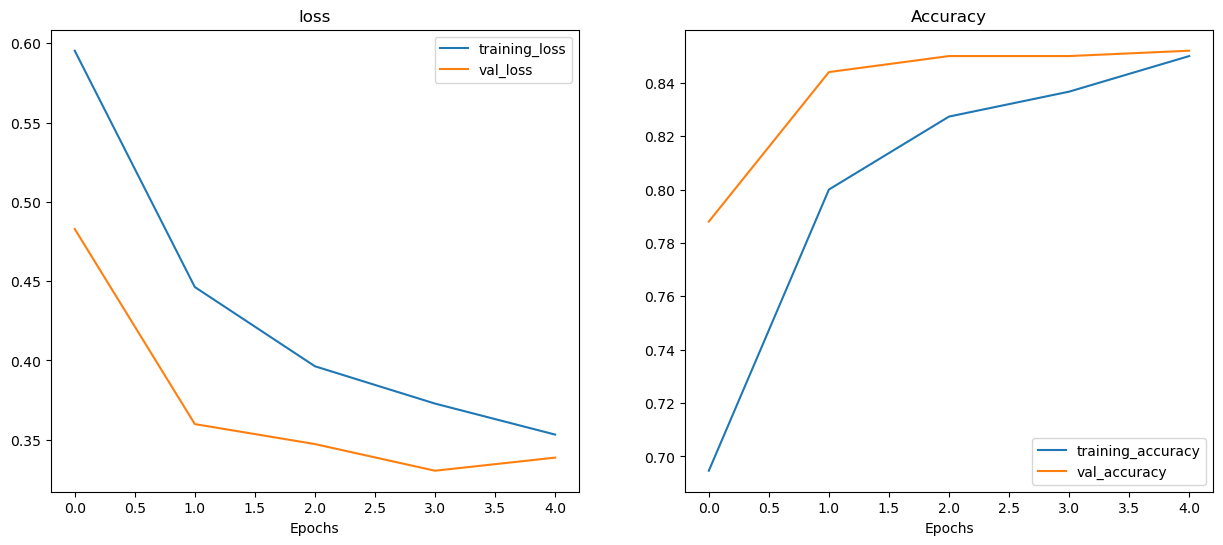

In [41]:
plot_history_curves(history_5)

In [55]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                            rotation_range=20,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [56]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [57]:
len(train_data_augmented), len(train_data), len(test_data)

(47, 47, 16)

In [58]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

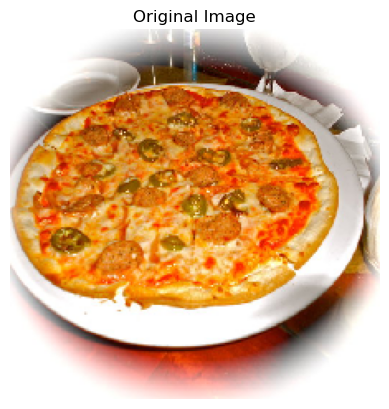

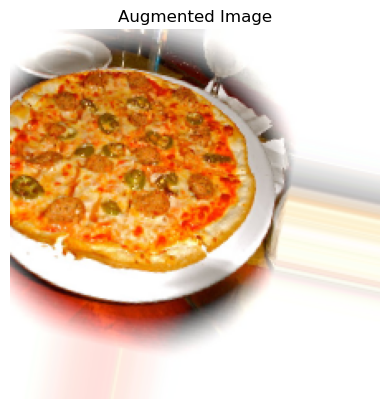

In [59]:
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [60]:
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 479ms/step - loss: 0.8274 - accuracy: 0.4773 - val_loss: 0.6912 - val_accuracy: 0.5440
Epoch 2/5
47/47 [==============================] - 20s 428ms/step - loss: 0.7133 - accuracy: 0.5673 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 20s 436ms/step - loss: 0.6887 - accuracy: 0.5747 - val_loss: 0.6675 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 20s 419ms/step - loss: 0.6765 - accuracy: 0.6287 - val_loss: 0.6285 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 20s 428ms/step - loss: 0.6488 - accuracy: 0.6580 - val_loss: 0.5445 - val_accuracy: 0.7840


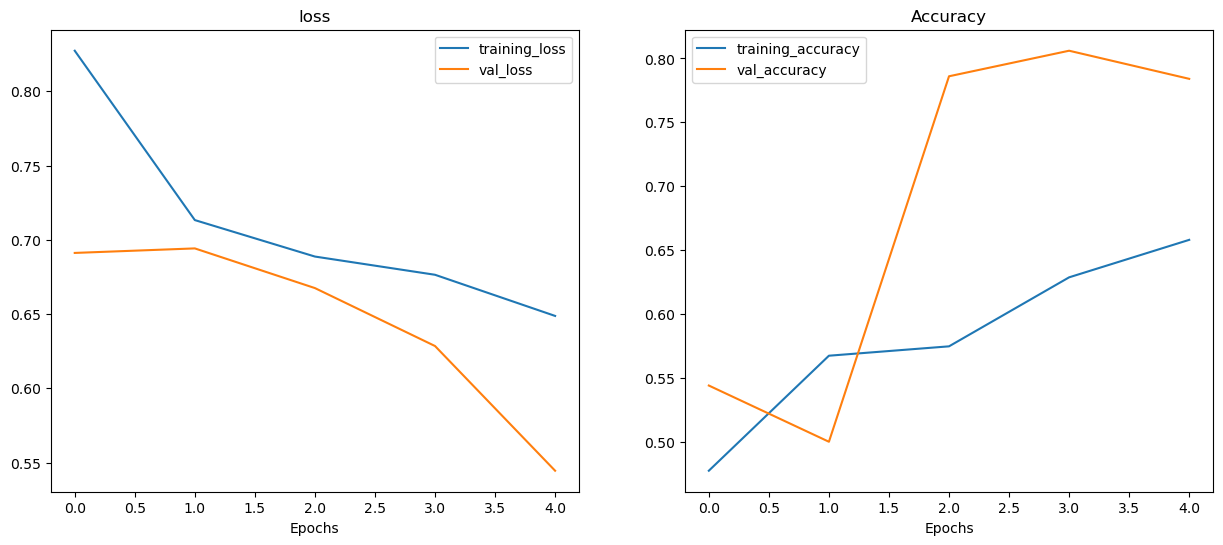

In [61]:
plot_history_curves(history_6)

In [62]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224, 224),
                                                                           batch_size=32,
                                                                           class_mode="binary",
                                                                           shuffle=True)

Found 1500 images belonging to 2 classes.


In [64]:
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
           epochs=5,
           steps_per_epoch=len(train_data_augmented_shuffled),
           validation_data=test_data,
           validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 425ms/step - loss: 0.6438 - accuracy: 0.6493 - val_loss: 0.5176 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 20s 431ms/step - loss: 0.5832 - accuracy: 0.7160 - val_loss: 0.4220 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 20s 416ms/step - loss: 0.5250 - accuracy: 0.7387 - val_loss: 0.3850 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 20s 429ms/step - loss: 0.5046 - accuracy: 0.7707 - val_loss: 0.4182 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 20s 434ms/step - loss: 0.5077 - accuracy: 0.7633 - val_loss: 0.3679 - val_accuracy: 0.8400


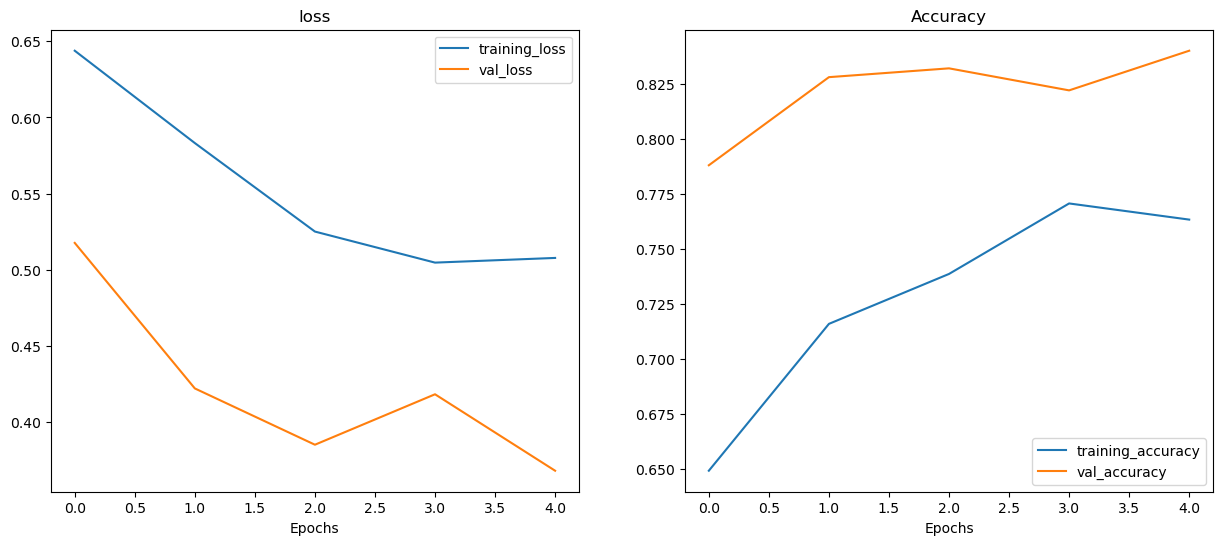

In [65]:
plot_history_curves(history_7)

In [66]:
print(class_names)

['pizza' 'steak']


--2023-05-29 19:42:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2023-05-29 19:42:54 (43.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



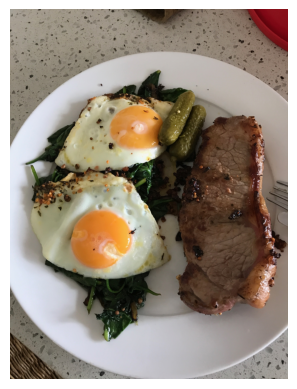

In [67]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [68]:
steak.shape

(4032, 3024, 3)

In [75]:
def load_and_prep_image(filename, img_shape=224):
    
    img = tf.io.read_file(filename)
    
    img = tf.image.decode_image(img, channels=3)
    
    img = tf.image.resize(img, size=[img_shape, img_shape])
    
    img = img/255
    
    return img

In [77]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [78]:
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0)
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [79]:
pred = model_7.predict(steak)
pred

1/1 [==============================] - 0s 196ms/step


array([[0.8647249]], dtype=float32)

In [80]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [81]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [82]:
def pred_and_plot(model, filename, class_names):
    
    img = load_and_prep_image(filename)
    
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    pred_class = class_names[int(tf.round(pred)[0][0])]
    
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 0s 20ms/step


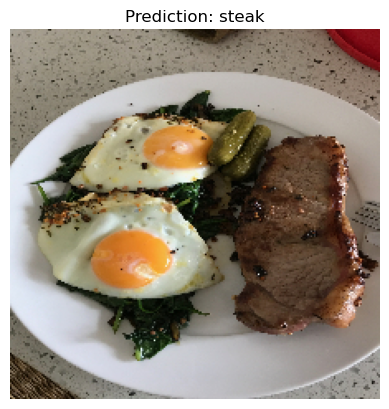

In [83]:
pred_and_plot(model_7, "03-steak.jpeg", class_names)

In [86]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 

--2023-05-29 20:03:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2023-05-29 20:03:55 (76.1 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



1/1 [==============================] - 0s 32ms/step


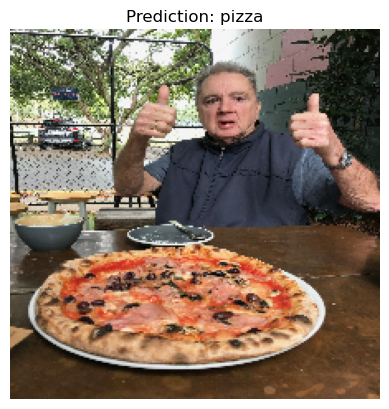

In [85]:
pred_and_plot(model_7, "03-pizza-dad.jpeg", class_names)